# Data Anlysis

This file is used to show that there is no positive corilation between AQI and any form of Absences

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import pearsonr

In [16]:
#read in the csv file that is needed
df_school = pd.read_csv('school_date_3.csv', index_col='Unnamed: 0')
#make a datetime stamp
df_school['Date'] =pd.to_datetime(df_school['date']).dt.date
df_school['datetime'] =pd.to_datetime(df_school['date'])
#cut the DataFrame to pre-pandemic Data
df_school=df_school[(df_school['datetime']<'01-01-2020')]
df_school=df_school.drop(columns=['Week', 'date'])

#read in the AQI data that is needed
df_aqi = pd.read_csv('daily_aqi_LA.csv', index_col='Unnamed: 0')
#make a datetime stamp
df_aqi["datetime"] = pd.to_datetime(df_aqi["Date"])
df_aqi['Date'] =pd.to_datetime(df_aqi['Date']).dt.date
#drop uneeded columns
df_aqi=df_aqi.drop(columns=['CBSA', 'CBSA Code', 'Defining Site'])
#drop some months that are not part of the school year
df_aqi=df_aqi[(df_aqi.datetime.dt.month >= 9) | (df_aqi.datetime.dt.month <= 6)]
df_aqi=df_aqi[(df_aqi.datetime>'06-01-2016') & (df_aqi.datetime<'01-01-2020')]
#reset the index
df_aqi=df_aqi.reset_index()

In [17]:
def trend_line(df):
    x = np.arange(df.shape[0])
    #make a modle of linear regression to modle the growth of absentisim over time
    fit = np.polyfit(x, df['pct_absences'], 1)
    fit_fn = np.poly1d(fit)
    #assing an empty column to hold the trend line
    df['trend_line']=0.0
    #plot the trend line into df2
    for x in range(df.shape[0]):
        #for each row of df2 find the value of the trendline and send it to df2
        df.loc[x,'trend_line']=fit_fn(x) 
    #Return df with the added trend line
    return df

In [18]:
#tag the year and the week of the year for df_school
df_school['week_of_year']=df_school['datetime'].dt.isocalendar().week.astype(float)
df_school['year']=df_school['datetime'].dt.isocalendar().year.astype(float)
#tag the year and the week of the year for df_aqi
df_aqi['week_of_year']=df_aqi['datetime'].dt.isocalendar().week.astype(float)
df_aqi['year']=df_aqi['datetime'].dt.isocalendar().year.astype(float)

In [19]:
#get a list of the unique year and week
years= df_aqi['year'].unique()
weeks= df_aqi['week_of_year'].unique()
#set up the empty DateFrame to write into
aqi_sums=pd.DataFrame([])

In [20]:
#iterate over ewvery unique week for every unique year
for year in years:
    for week in range(54):
        #pull the DataFrame for the specific year and week 
        df_aqi_1=df_aqi[(df_aqi['year']==year) & (df_aqi['week_of_year']==week)]
        #sum that subdataframe and wirte it to aqi_sums and tag on the week and year
        aqi_sums.loc[x, 'aqi_sum']=df_aqi_1['AQI'].sum()
        aqi_sums.loc[x, 'year']=year
        aqi_sums.loc[x, 'week']=week    

In [21]:
#Left Merge DataFrames to assosiate abcences and AQI data
df_school = pd.merge(df_school, aqi_sums,  how='left', left_on=['year','week_of_year'], right_on = ['year','week'])

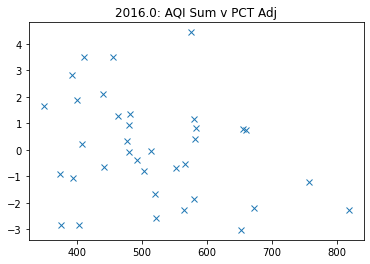

Pearsons correlation: -0.283


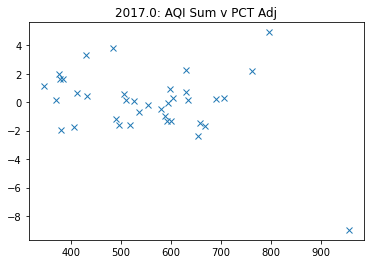

Pearsons correlation: -0.322


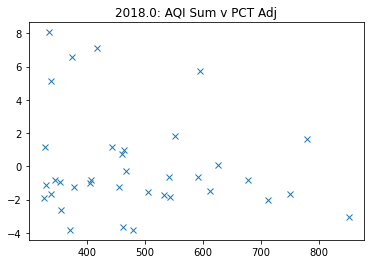

Pearsons correlation: -0.180


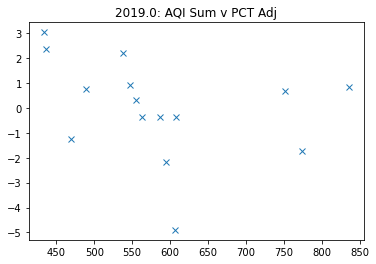

Pearsons correlation: -0.303


In [22]:
#itterate over the years avalible
for i in [2016.0, 2017.0, 2018.0, 2019.0]:
    #pull the first year and the next year
    df_school_1=df_school[(df_school['year']==i) & (df_school['week']>=26)]
    df_school_2=df_school[(df_school['year']==i+1) & (df_school['week']<=26)]
    #concatinate the DataFrames to make the school year
    df_total=pd.concat([df_school_1,df_school_2])
    #reset the index
    df_total=df_total.reset_index(drop=True)
    #use the trend_line function 
    df_total=trend_line(df_total)
    #scrub the linear trend form the data
    df_total['pct_adj']=df_total['pct_absences']-df_total['trend_line']
    #constuct the title of the graphs
    plt.title(str(i)+': AQI Sum v PCT Adj')
    #plt.plot(df_total['datetime'], df_total['trend_line'])
    plt.plot(df_total['aqi_sum'], df_total['pct_adj'],'x')
    plt.show()
    # calculate Pearson's correlation
    corr, _ = pearsonr(df_total['aqi_sum'], df_total['pct_adj'])
    print('Pearsons correlation: %.3f' % corr)